In [1]:
%matplotlib inline
import scipy.special
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N=1000
Nt= 100
b=0
c=3480000
secingyr=3.15569e16
t=1*secingyr
evtoj=1.602e-19
Na=6.022140857e23

# xmod=0 at r=c; BC's are always applied at x=0
x = np.linspace(b,c,num=N)
cvec=c*np.ones(N)
xmod=(cvec-x)

Total O in core =  7.197971789320436e+22
Constant I needed to fill core with this much O =  506877.8259320949
O conc at CMB =  0.19574468085106383
int i dt =  8.13060763803e+21
mean i   =  57413.0519458


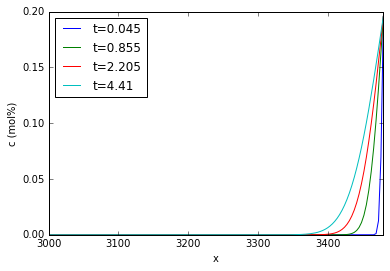

In [3]:
time   = np.zeros(Nt)
ttot   = 4.5*secingyr
dt     = ttot/Nt
Diff   = 5e-9
rho    = 1e4
AO     = 16
AFe    = 56
Rh     = 1.5
HoR=Rh*evtoj*Na*1000/16 

conc   = np.zeros((Nt,N))
dcdr   = np.zeros((Nt,N))
iflux  = np.zeros((Nt,N))
iflux2 = np.zeros((Nt,N))
iflux3 = np.zeros((Nt,N))
Qh     = np.zeros(Nt)

co = 0.13
nc = 2.084e49
Mo = nc*co*AO/(1000*Na)
I = Mo/ttot
print('Total O in core = ', Mo)
print('Constant I needed to fill core with this much O = ',I)

c_cmb    = 0.46 * AO / 37.6 # convert molar conc to mass conc
print('O conc at CMB = ', c_cmb)

f = open('conc_tseries','w')

time[1] = 0
for i in range (2,Nt):
    time[i] = time[i-1] + dt
    
    h=2.0*np.sqrt(Diff*time[i])
    hvec=h*np.ones(N)
    xmod=(cvec-x)
    zeta=xmod/hvec

    #conc[i,:] = h * dcdr_cmb * (np.exp(-zeta**2)/np.sqrt(np.pi) - zeta*scipy.special.erfc(zeta) )
    conc[i,:] =    c_cmb * scipy.special.erfc(zeta)
    dcdr[i,:] =  2*c_cmb*np.exp(-zeta**2)/np.sqrt(np.pi)/h
    iflux[i,:] = 2*c_cmb*np.exp(-zeta**2)/np.sqrt(np.pi)/h * (4*np.pi*Diff*x*x*9900)
    iflux2[i,:] = iflux[i,:]/2
    iflux3[i,:] = iflux2[i,:]/2    
    
    no   = str(time[i]/secingyr)
    fname= 'conc_t='# + no
    fl   = open(fname, 'w')
    for j in range (1,N):
        data = str(x[j]) + ' ' + str(dcdr[i,j]) + '\n'
        fl.write(data)
    fl.close()
    
    data = no + ' ' + str(conc[i,N-1]) + "\n"
    f.write(data)
    Qh[i] = iflux[i,N-1]*HoR
    
int_i_x0_dt = np.trapz(iflux[:,N-1],time)

f.close()

print('int i dt = ', int_i_x0_dt)
print('mean i   = ',np.mean(iflux[:,N-1]))
    
plt.plot(x/1e3,conc[2,:],label='t='+str(time[2]/secingyr))
plt.plot(x/1e3,conc[20,:],label='t='+str(time[20]/secingyr))
plt.plot(x/1e3,conc[50,:],label='t='+str(time[50]/secingyr))
plt.plot(x/1e3,conc[99,:],label='t='+str(time[99]/secingyr))
plt.xlim([3000,c/1e3])
plt.xlabel('x')
plt.ylabel('c (mol%)')
plt.legend(loc='upper left')
plt.show()

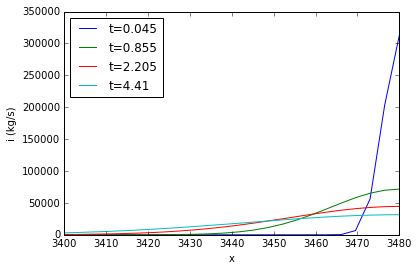

In [4]:
# Plot the mass flux as a function of position and time
plt.plot(x/1e3,iflux[2,:],label='t='+str(time[2]/secingyr))
plt.plot(x/1e3,iflux[20,:],label='t='+str(time[20]/secingyr))
plt.plot(x/1e3,iflux[50,:],label='t='+str(time[50]/secingyr))
plt.plot(x/1e3,iflux[99,:],label='t='+str(time[99]/secingyr))
plt.xlim([3400,c/1e3])
plt.xlabel('x')
plt.ylabel('i (kg/s)')
plt.legend(loc='upper left')
plt.show()

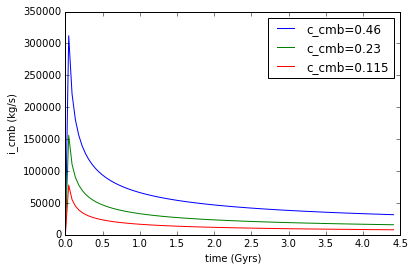

In [5]:
plt.plot(time/secingyr,iflux[:,N-1],label='c_cmb=0.46')
plt.plot(time/secingyr,iflux2[:,N-1],label='c_cmb=0.23')
plt.plot(time/secingyr,iflux3[:,N-1],label='c_cmb=0.115')
plt.ylabel('i_cmb (kg/s)')
#ax = plt.gca()
#ax2 = ax.twinx()
#ax2.plot(time/secingyr,Qh[:]/1e12,label='',color='red')
plt.xlabel('time (Gyrs)')
plt.ylabel('i_cmb (kg/s)')
plt.legend(loc='upper right')
#ax2.set_ylabel("Qh (TW)",color='red')
plt.show()

In [6]:
"""Set up zeta"""
h=2.0*np.sqrt(D*t)

cvec=c*np.ones(N) #vector of CMB radius valuea
hvec=h*np.ones(N) #vector of h values
zeta=xmod/hvec

NameError: name 'D' is not defined

In [ ]:
"""Section 2.4, equation 10: Semi-infinite solid, Boundary at temperature V, initial T=0"""

"""Assume a positive temperature anomaly ~ convective anomalies"""
T0 = 5e-4
ft = T0 * (scipy.special.erfc(zeta))

"""Section 2.9, equation 9"""
"""Imagine we are slightly subadiabatic. BC is constant flux per unit area."""
Qcmb = 15.0e12
Qad  = 15.1e12
F0 = -(Qcmb - Qad)/(4*np.pi*c**2)
ff = F0 * (np.exp(-zeta**2)/np.sqrt(np.pi) - zeta*scipy.special.erfc(zeta) )

In [352]:
"""Section 2.5, equation 4: Semi-infinite solid, Boundary at temperature V(t)=kt, initial T=0"""

Tstart = 1.2e-4
Tend   = 1.0e-4
TT0    = (Tstart-Tend)/(t)

term1 = (1 + xmod**2/(2*D*t)) * scipy.special.erfc(zeta)
term2 = (xmod/np.sqrt(np.pi*D*t)) * np.exp(-zeta**2)
ft_tdep = TT0*t*(term1 - term2)

In [353]:
"""Setion 3.4, pg 100"""

l = c-500

sum = 0
for n in range (0,Nt): 
    fac = (-1)**n / (2*n+1)
    earg = -D*(2*n+1)**2*np.pi**2*t/(4*l**2)
    carg = (2*n+1)*np.pi*xmod/(2*l)
    sum = sum + ( fac * np.exp(earg) * np.cos(carg) )
    
ft_plane = T0 - 4*T0*sum/np.pi

In [389]:
"""Section 2.7, equation 5: Semi-infinite solid, Radiation condition with T V, initial T=0 """

h  = 1e-6
T0 = 5e-4
term1 = scipy.special.erfc(zeta)
term2 = np.exp(h*xmod + D*t*h**2*np.ones(N)) * scipy.special.erfc(zeta + h*np.sqrt(D*t))
print(np.exp(D*t*h**2))
ft_rad = T0 * (term1 - term2)

1.37103921037


In [390]:
"""Polynomial adiabat"""
t1_c= 3.00531e-06 
t2_c=-3.17791e-08 
t3_c= 2.8425e-13
T_cen = 7000

Ta    = T_cen * (1.0 + t1_c*(x/1e3) + t2_c*(x*x/1e6)       + t3_c*(x*x*x/1e9))
dTadr = T_cen * (t1_c + 2.0*t2_c*(x/1e3) + 3.0*t3_c*(x*x/1e6))
dTadr = dTadr / 1e3

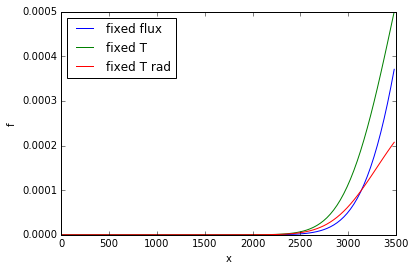

In [404]:
plt.plot(x/1e3,ff,label='fixed flux')
plt.plot(x/1e3,ft,label='fixed T')
plt.plot(x/1e3,ft_rad,label='fixed T rad')
#plt.plot(x/1e3,ft_tdep,label='fixed T time-dependent')
#plt.plot(x,Ta,label='Ta')
plt.xlabel('x')
plt.ylabel('f')
plt.legend(loc='upper left')
plt.show()

In [430]:
"""Compare time-dependent and time-independent solutions
   Create an array of Nt times points evenly spaced between 0 and t
   Create an array of Nt CMB Temperatures evenly spaced between Tstart and Tend
   Note that $\phi(t) = kt$
   
   The example, graphed below, demonstrates clear that the time-independent solution 
   is a poor approximation to the time-dependent solution is the initial condition is always zero. 
   The approx gets worse as time goes on. """

Nt     = 100
Tcmb   = np.zeros(Nt)
time   = np.zeros(Nt)
Tdep_soln = np.zeros((Nt,N))
Tstart = 2000.0
Tend   = 1000.0
dt     = t/Nt
k = -(Tstart-Tend)/t

Tindep_soln10 = np.zeros(N)
Tindep_soln20 = np.zeros(N)
Tindep_soln50 = np.zeros(N)
Tindep_soln80 = np.zeros(N)

Tcmb[1] = Tstart
time[1] = 0
for i in range (2,Nt):
    time[i] = time[i-1] + dt
    Tcmb[i] = time[i]*k+Tstart
    
    h=2.0*np.sqrt(D*time[i])
    cvec=c*np.ones(N)
    hvec=h*np.ones(N)
    xmod=(cvec-x)
    zeta=xmod/hvec
        
    term1 = (1 + xmod**2/(2*D*time[i])) * scipy.special.erfc(zeta)
    term2 = (xmod/np.sqrt(np.pi*D*time[i])) * np.exp(-zeta**2)
    Tdep_soln[i,:] = (k*time[i]+Tstart)*(term1 - term2)
    
    if(i==19): 
        Tindep_soln10 = Tcmb[i] * (scipy.special.erfc(zeta))
    if(i==20): 
        h_new=2.0*np.sqrt(D*dt)
        print(time[i], dt)
        hvec_new=h_new*np.ones(N)
        zeta_new=xmod/hvec_new
        Tindep_soln20 = Tcmb[i] * scipy.special.erfc(zeta)*np.exp(-zeta**2)#(scipy.special.erfc(zeta_new))
    if(i==50): 
        Tindep_soln50 = Tcmb[i] * (scipy.special.erfc(zeta))*np.exp(-zeta**2)
    if(i==80): 
        Tindep_soln80 = Tcmb[i] * (scipy.special.erfc(zeta))
        #print(time[i]/secingyr, Tcmb[i])
        #print((scipy.special.erfc(zeta)), term2)



5.995811e+15 315569000000000.0


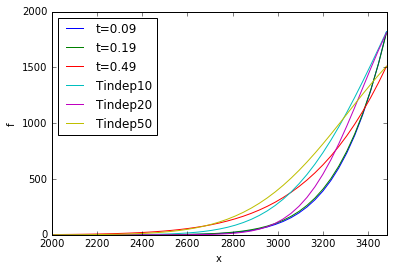

In [432]:
plt.plot(x/1e3,Tdep_soln[19,:],label='t='+str(time[10]/secingyr))
plt.plot(x/1e3,Tdep_soln[20,:],label='t='+str(time[20]/secingyr))
plt.plot(x/1e3,Tdep_soln[50,:],label='t='+str(time[50]/secingyr))
#plt.plot(x/1e3,Tdep_soln[80,:],label='t='+str(time[80]/secingyr))
plt.plot(x/1e3,Tindep_soln10  ,label='Tindep10')
plt.plot(x/1e3,Tindep_soln20  ,label='Tindep20')
plt.plot(x/1e3,Tindep_soln50  ,label='Tindep50')
#plt.plot(x/1e3,Tindep_soln80  ,label='Tindep80')
#plt.plot(x/1e3,Ta,label='Ta')
plt.xlabel('x')
plt.ylabel('f')
plt.xlim(2000,3480)
plt.legend(loc='upper left')
plt.show()

We make the following assumptions at the outset: 
* The thermal conductivity $k$ is independent of space and time. 
* The relevant boundary condition at the CMB, $r=c$ is fixed flux. 
* The layer remains thin enough that curvature effects can be neglected. 
* The initial condition is $T=0$, i.e. we can remove an adiabat.  

There are 4 cases of interest: 
* Semi-infinite half space, boundary conditions time-independent, no internal sources
* Semi-infinite half space, boundary conditions time-dependent  , no internal sources
* Semi-infinite half space, boundary conditions time-independent,    internal sources
* Semi-infinite half space, boundary conditions time-dependent  ,    internal sources
* Plane layer             , boundary conditions time-independent, no internal sources

**Infinite solid**
The fundamental solution is 

$$T = \frac{1}{2\sqrt{\pi D t}} \int_{-\infty}^{\infty} f(x^{\prime}) \exp^{ \frac{(x-x^{\prime})^2}{4Dt} }dx^{\prime}$$

**Semi-infinite half-space**

Let the initial temperature distribution $f(x)=V=$constant and substitute $\zeta=(x^{\prime}-x)/2\sqrt{Dt} \rightarrow dx^{\prime} = 2\sqrt{Dt}  d\zeta$, $\zeta = x/2\sqrt{Dt} \mbox{ at } x^{\prime}=0$:

$$T = \frac{V}{\sqrt{\pi}} \int_{x/2\sqrt{Dt}}^{\infty} \exp^{\zeta^2} d\zeta$$

Split the integral up: 
$$\int_{0}^{\infty} \exp^{\zeta^2} d\zeta - \int_{0}^{x/2\sqrt{Dt}} \exp^{\zeta^2} d\zeta = \frac{\sqrt{\pi}}{2} \left(1 - \mathrm{erf}(x/2\sqrt{Dt}) \right)$$
$$T = \frac{V}{2} \mathrm{erfc}\left(\frac{x}{2\sqrt{Dt}}\right)$$

This is the solution for fixed $T$ at the boundary (pg 60, eqn 10). For fixed flux independent of time (section 2.9) simply note that the flux $f=-K\frac{\partial T}{\partial x}$ also satisfies the diffusion equation so we need to do $K^-1 \int_{x}^{\infty} f dx$. Noting

$$i   \mathrm{erfc}(x) = \frac{1}{\sqrt{\pi}} \exp^{-x^2} - x\mathrm{erfc}(x) \mbox{ Appendix 2, (11)}$$
$$i^2 \mathrm{erfc}(x) = \frac{1}{4}\left[ (2x^2+1)\mathrm{erfc}(x) - \frac{2x}{\sqrt{\pi}} \exp^{-x^2} \right] \mbox{ Appendix 2 ,(12/13)}$$

Fixed flux at $x=0$, $T(x,0)=0$ (2.9, eqn 7, pg 75):  
$$f(x) = \frac{2F_0\sqrt(D t)}{k} \mathrm{ierfc}(\zeta)$$